# Lab 3 - DTFT, FFT, and Their Applications
The goal of this lab is to visualize frequency domain analysis. We will next apply Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT) in three real-world applications, including feature extraction, image compression, and data denoising. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

## Task 1: Decompose Square Wave into Harmonic Components

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

def generate_square_wave(t_duration, freq, fs):
    """Generate a square wave with fundamental frequency freq of duration t_duration and sampling frequency fs

    Args:
        t_duration (float): Duration of square wave
        freq (int): Fundamental frequency of square wave
        fs (int): Sampling frequency

    Returns:
        square_wave (ndarray): Desired square wave (peak value: 1; peak-to-peak: 1)
    """
    t = np.linspace(0, t_duration, int(fs * t_duration), endpoint=False) # generate time array
    # your code below
    # We can first generate a sine function sin(2\pi*freq*t), and then apply sign function as sign(sin(2\pi*freq*t))
    
    square_wave = np.sign(np.sin(2 * np.pi * freq * t))
    return t, square_wave


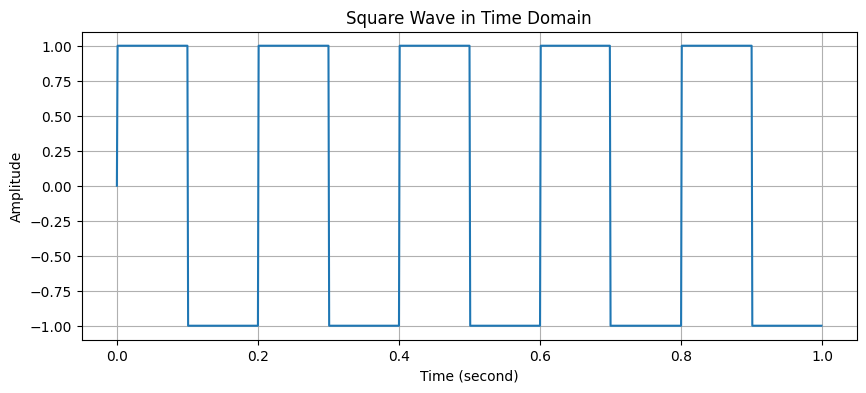

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
# Parameters for the square wave
sampling_rate = 1000  # Samples per second
duration = 1.0        # Duration of the signal in seconds
fundamental_freq = 5  # Frequency of the square wave in Hz

t, square_wave = generate_square_wave(duration, fundamental_freq, sampling_rate)

# visualize the square wave
plt.figure(figsize=(10, 4))
plt.plot(t, square_wave)
plt.title("Square Wave in Time Domain")
plt.xlabel("Time (second)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


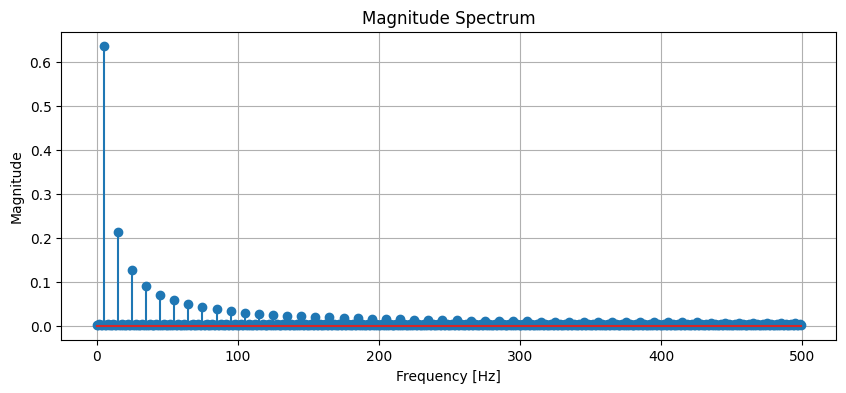

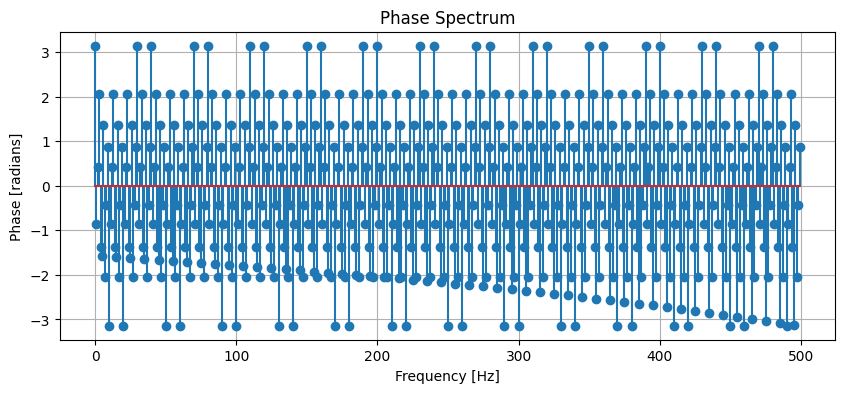

In [11]:

# Compute the DFT using numpy.fft.fft
N = len(square_wave)  # Number of samples
dft = np.fft.fft(square_wave)
frequencies = np.fft.fftfreq(N, d=1/sampling_rate)  # Frequency axis

# Compute magnitude and phase
magnitude = np.abs(dft) / N  # Normalize by N
phase = np.angle(dft)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:N // 2], magnitude[:N // 2])  # Single-sided spectrum
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# Plot the phase spectrum
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:N // 2], phase[:N // 2])  # Single-sided spectrum
plt.title("Phase Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.grid()
plt.show()

In [15]:

def reconstruct_wave(harmonics, t, frequencies):
    """_summary_

    Args:
        harmonics (ndarray): Set of frequencies of harmonic components to use
        t (ndarray): Time vector
        frequencies (ndarray): Frequency components

    Returns:
        reconstruction: Reconstructed signal using harmonic components
    """
    # initialize the recosntructed signal
    reconstruction = np.zeros_like(t, dtype=complex)
    
    for harmonic in harmonics:
        idx = np.argmin(np.abs(frequencies - harmonic))  # Find the index of the harmonic
        # your code goes below
        reconstruction += np.exp(1j * 2 * np.pi * frequencies[idx] * t)

    return reconstruction


C:\Users\Rebec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Rebec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


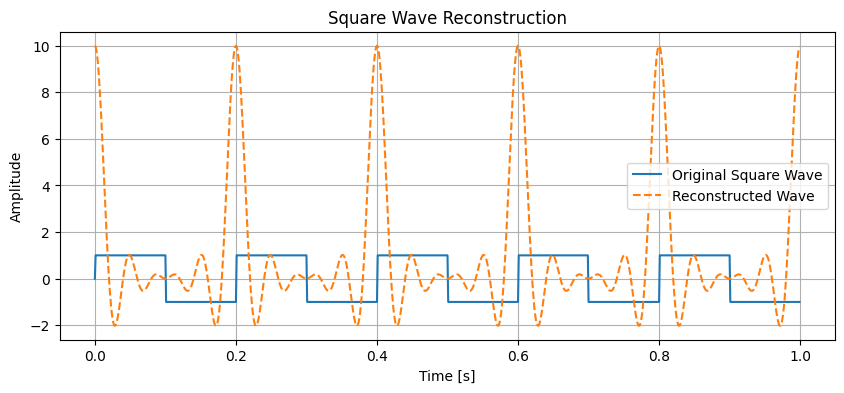

In [14]:

# call the reconstruct_wave to reconstruct the square wave
harmonics_to_use = np.array(list(range(-5, 5))) * fundamental_freq  
reconstructed_wave = reconstruct_wave(harmonics_to_use, t, frequencies)

# Plot the original and reconstructed square wave
plt.figure(figsize=(10, 4))
plt.plot(t, square_wave, label="Original Square Wave")
plt.plot(t, reconstructed_wave, label="Reconstructed Wave", linestyle="--")
plt.title("Square Wave Reconstruction")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

## Task 2: Image Compression using FFT 

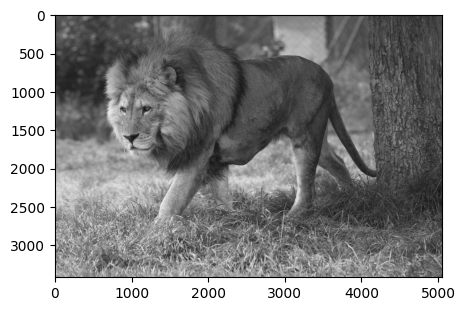

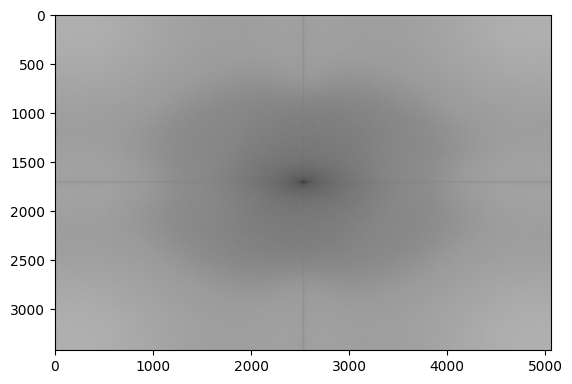

In [16]:
# Load and display image
img = Image.open("lion.jpg").convert('L')
img = np.array(img)
_ = plt.figure(figsize=(5, 5))
_ = plt.imshow(img, cmap ='gray', vmin=0, vmax=255)

img_fft = np.fft.fft2(img)  # Perform FFT on the image
img_fft_log = np.log(np.abs(np.fft.fftshift(img_fft)) + 1)  # Convert FFt to log scale
# Visualize FFT
plt.figure()
_ = plt.imshow(256 - img_fft_log, cmap='gray')

In [19]:
def compress_img(img_fft, ratio):
    """Compress an image by keeping a specified percentage of FFT components

    Args:
        img_fft (ndarray): FFT of image
        ratio (float): The ratio of FFT components to keep
    """
    # your code goes below
    img_fft_sort = np.sort(np.abs(img_fft).flatten())  # Sort img_fft by magnitude
    thresh = img_fft_sort[int(len(img_fft_sort) * (1 - ratio))]  # Compute threshold of magnitude
    ind = np.abs(img_fft) > thresh  # Find indices of components that are larger than threshold
    fft_keep = img_fft * ind  # Zero out components with small magnitudes
    compressed_img = np.abs(np.fft.ifft2(fft_keep))  # Use inverse FFT
    _ = plt.imshow(256 - compressed_img, cmap='gray')  # Show reconstructed image
    plt.title(f"Compressed Image with {ratio * 100:.1f}% Components Kept", fontsize=12)

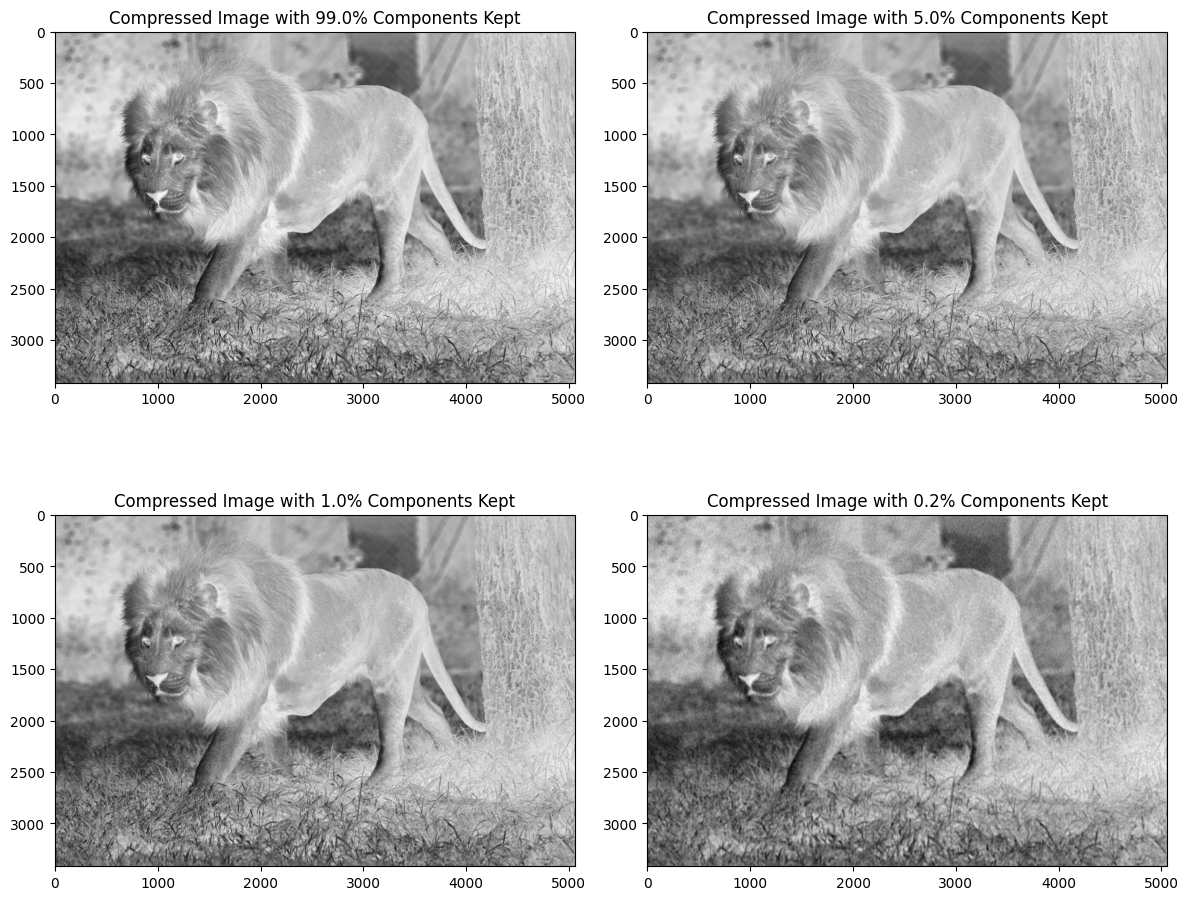

In [21]:
# call compress_img with ratio = 0.99, 0.05, 0.01, 0.002
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
compress_img(img_fft, 0.99)

plt.subplot(2, 2, 2)
compress_img(img_fft, 0.05)

plt.subplot(2, 2, 3)
compress_img(img_fft, 0.01)

plt.subplot(2, 2, 4)
compress_img(img_fft, 0.002)

plt.tight_layout()
plt.show()

## Task 3: Denoising a Signal using FFT

In [ ]:

def generate_sine(duration, frequency, sample_rate):
    """Generates samples of a sine wave.

    Samples are generated according to following equation:

        y(t) = A sin(2*pi*f*t)

    Args:
        frequency: The frequency of the note.
        duration: The length of the note in seconds.
        amplitude: The amplitude of the note.
        sample_rate: The sample rate.

    Returns:
        An array of samples.
    """
    # Enter code here
    num_samples = int(duration * sample_rate)
    t = np.linspace(0, duration, num_samples)
    sine_wave = np.sin(2*np.pi*frequency*t)
    return sine_wave

In [ ]:
# call generate_sine to generate function g and the noisy signal
# your code here
g = 
noise = 
noisy_signal = 

plt.figure(figsize=(10, 4))
_ = plt.plot(range(len(noisy_signal)), noisy_signal, label="Noisy signal", linestyle="--")
_ = plt.plot(range(len(g)), g, label="Original signal")
plt.xlabel("Index")
plt.ylabel("Signal")
plt.legend()
plt.show()

In [ ]:

def filter_with_psd(signal, sampling_rate, threshold_ratio):
    """
    Filters a signal based on its Power Spectral Density (PSD)

    Args:
        signal (ndarray): The input time-domain signal.
        sampling_rate (float): The sampling rate of the signal (Hz).
        threshold_ratio (float): Fraction of the PSD to retain (e.g., 0.1 for top 10%).

    Returns:
        filtered_signal (ndarray): The filtered signal in the time domain.
    """
    # your code goes below
    # Compute the FFT of the signal

    # Compute the Power Spectral Density (PSD)


    # Sort the PSD to find the threshold


    # Create a mask to retain frequencies with PSD above the threshold


    # Apply the mask to the FFT signal


    # Reconstruct the signal using the inverse FFT


    # Compute the mean squared error between the original and filtered signals
    error = np.mean((noisy_signal - filtered_signal) ** 2)
    print(error)

    # Plot original and filtered signals for comparison
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(noisy_signal, label='Original Signal')
    plt.title('Original Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(filtered_signal, label='Filtered Signal', color='orange')
    plt.title('Filtered Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return filtered_signal


In [ ]:
# call filter_with_psd with different threshold ratio and compare the filtering effect